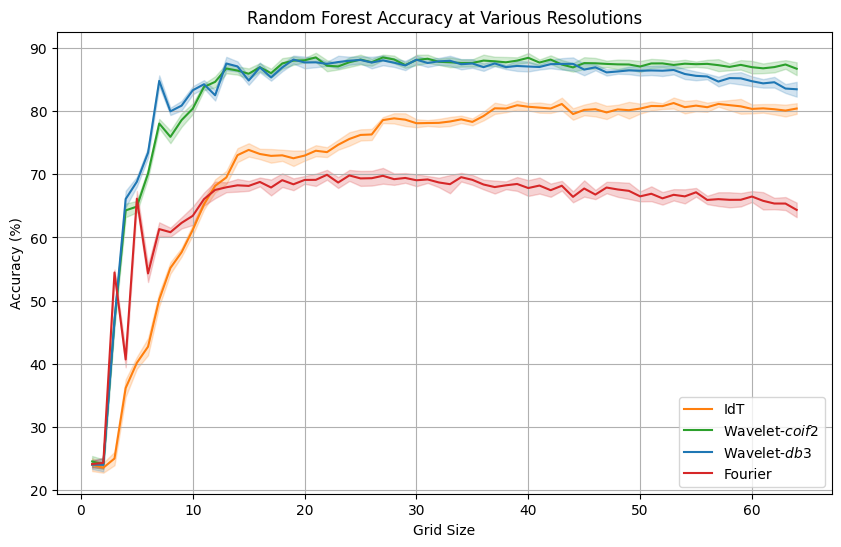

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def parse_data(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    
    parsed_data = []
    for line in data:
        match = re.match(r'Resolution: (\d+), Mean: ([\d.]+), Std: ([\d.]+)', line)
        if match:
            resolution = int(match.group(1))
            mean = float(match.group(2)) * 100  # Convert to percentage
            std = float(match.group(3)) * 100   # Convert to percentage
            parsed_data.append([resolution, mean, std])
    
    return pd.DataFrame(parsed_data, columns=['Resolution', 'Mean', 'Std'])

data_path = "./results"

id_path = f'{data_path}/id_results.txt'
coif2_path = f'{data_path}/coif2_results.txt'
db3_path = f'{data_path}/db3_results.txt'
fourier_path = f'{data_path}/fft_results.txt'

# Parsing data
id_data = parse_data(id_path)
coif2_data = parse_data(coif2_path)
db3_data = parse_data(db3_path)
fourier_data = parse_data(fourier_path)


# Plotting
plt.figure(figsize=(10, 6))

palette = sns.color_palette()


# Plot for ID
plt.plot(id_data['Resolution'], id_data['Mean'], label='IdT', color=palette[1])
plt.fill_between(id_data['Resolution'], id_data['Mean'] - id_data['Std'], id_data['Mean'] + id_data['Std'], alpha=0.2, color=palette[1])


# Plot for coif2
plt.plot(coif2_data['Resolution'], coif2_data['Mean'], label='Wavelet-$coif2$', color=palette[2])
plt.fill_between(coif2_data['Resolution'], coif2_data['Mean'] - coif2_data['Std'], coif2_data['Mean'] + coif2_data['Std'], alpha=0.2, color=palette[2])

# Plot for db3
plt.plot(db3_data['Resolution'], db3_data['Mean'], label='Wavelet-$db3$', color=palette[0])
plt.fill_between(db3_data['Resolution'], db3_data['Mean'] - db3_data['Std'], db3_data['Mean'] + db3_data['Std'], alpha=0.2, color=palette[0])

# Plot for FOURIER
plt.plot(fourier_data['Resolution'], fourier_data['Mean'], label='Fourier', color=palette[3])
plt.fill_between(fourier_data['Resolution'], fourier_data['Mean'] - fourier_data['Std'], fourier_data['Mean'] + fourier_data['Std'], alpha=0.2, color=palette[3])



plt.xlabel('Grid Size')
plt.ylabel('Accuracy (%)')
plt.title('Random Forest Accuracy at Various Resolutions')
plt.legend()
plt.grid(True)
plt.show()